In [1]:
import pandas as pd
import numpy as np

# prepare Data

In [2]:
skip_plot = False
version = 'v2'
file_path = './data/{}/data_selected_FR_2018-2023.csv'.format(version)
data = pd.read_csv(file_path)

In [3]:
data.columns

Index(['timestamp', 'price_da', 'price_da_DE_LU', 'price_da_IT_NORD',
       'nuclear_avail', 'carbon_price', 'gas_price', 'solar_da', 'load_da',
       'wind_da', 'rl_BE', 'rl_DE_LU', 'rl_ES', 'rl_IT_NORD', 'temp_mean',
       'river_temp', 'river_flow_mean', 'rl_FR_ramp', 'run_off_gen',
       'agg_net_export', 'day_of_year', 'hour', 'isworkingday'],
      dtype='object')

In [4]:
data.index = pd.to_datetime(data['timestamp']) # add timestamp index

<Axes: xlabel='timestamp'>

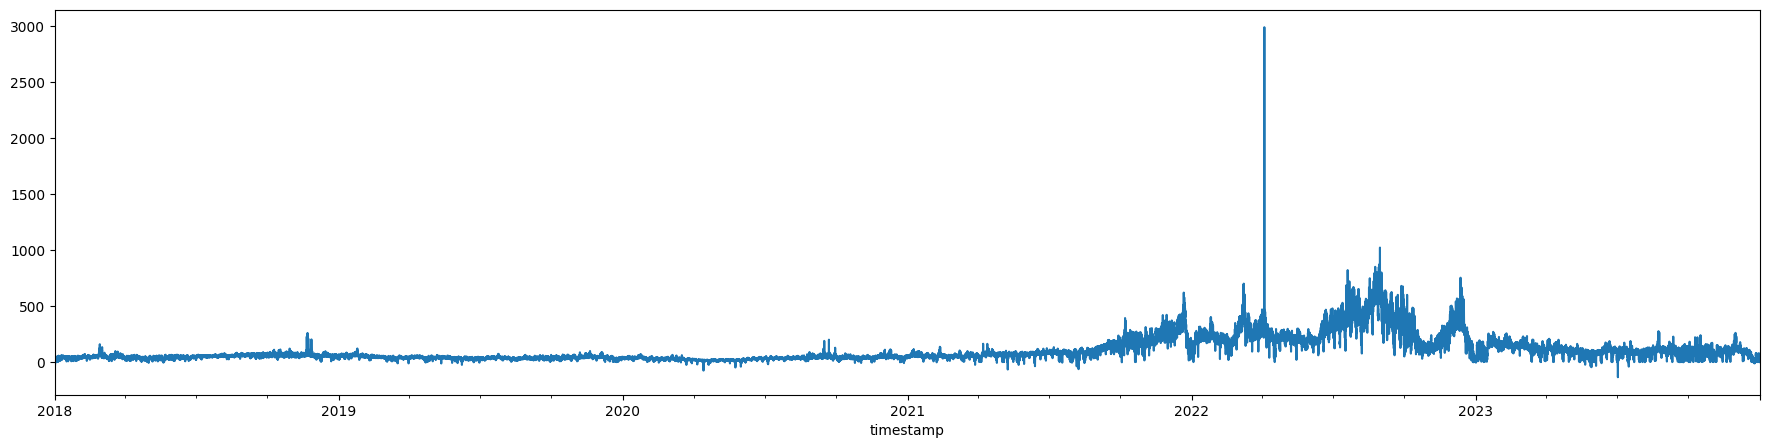

In [5]:
data['price_da'].plot(figsize=(22, 5))

<Axes: xlabel='timestamp'>

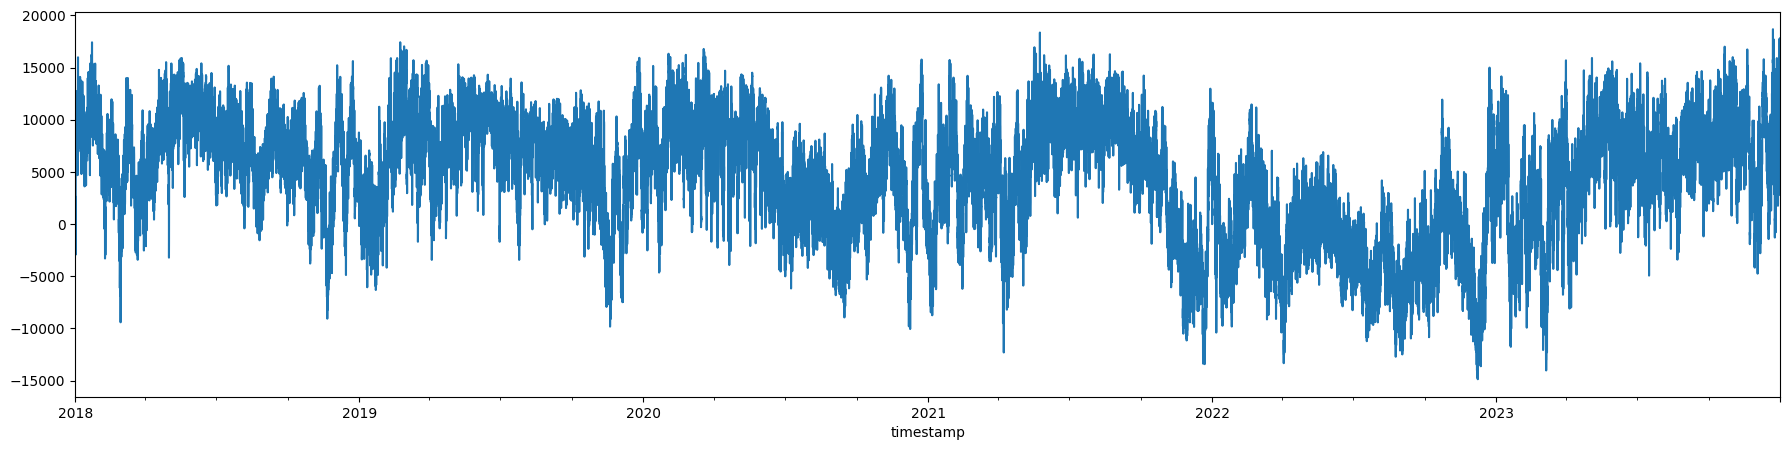

In [42]:
data['agg_net_export'].plot(figsize=(22, 5))

In [43]:
print(data.columns)

Index(['timestamp', 'price_da', 'price_da_DE_LU', 'price_da_IT_NORD',
       'nuclear_avail', 'carbon_price', 'gas_price', 'solar_da', 'load_da',
       'wind_da', 'rl_BE', 'rl_DE_LU', 'rl_ES', 'rl_IT_NORD', 'temp_mean',
       'river_temp', 'river_flow_mean', 'rl_FR_ramp', 'run_off_gen',
       'agg_net_export', 'day_of_year', 'hour', 'isworkingday'],
      dtype='object')


In [44]:
columns_to_keep = ['nuclear_avail', 'carbon_price', 'gas_price',
                   'solar_da', 'load_da', 'wind_da', 
                   'rl_BE', 'rl_DE_LU', 'rl_ES', 'rl_IT_NORD', 
                   'temp_mean', 'river_temp', 'river_flow_mean', 
                   'rl_FR_ramp', 
                   'run_off_gen',
                   'isworkingday'
]

### drop columns containing NaN

In [46]:
na_col = columns_to_keep.copy()
na_col.append('price_da')

In [47]:
data[na_col].isna().sum()

nuclear_avail         0
carbon_price          0
gas_price             0
solar_da            398
load_da             243
wind_da             353
rl_BE                 0
rl_DE_LU           1105
rl_ES                 1
rl_IT_NORD            0
temp_mean             0
river_temp           12
river_flow_mean       0
rl_FR_ramp            1
run_off_gen          16
isworkingday          0
price_da              0
dtype: int64

In [48]:
prev_col = data.shape[0]
nr_dropped_col = data[na_col].isna().any(axis=1).sum()
data.dropna(how='any', inplace=True, subset = na_col)
new_col = data.shape[0]
print("Dropped {} of {} columns, remaining columns: {}".format(nr_dropped_col, prev_col, new_col))

Dropped 1631 of 52584 columns, remaining columns: 50953


In [ ]:
X = data[columns_to_keep].copy()
timestamp = X.index
X.loc[:,'day_of_year_sin'] = np.sin(timestamp.dayofyear/365*2*np.pi)
X.loc[:,'day_of_year_cos'] = np.cos(timestamp.dayofyear/365*2*np.pi)
X.loc[:,'hour_sin'] = np.sin(timestamp.hour/24*2*np.pi)
X.loc[:,'hour_cos'] = np.cos(timestamp.hour/24*2*np.pi)

In [50]:
y_price = data['price_da'].to_frame(name='price_da')
y_export = data['agg_net_export'].to_frame(name='agg_net_export')

In [51]:
print("len(X)={}, len(y_price)={}, len(y_export={})".format(len(X), len(y_price), len(y_export)))

len(X)=50953, len(y_price)=50953, len(y_export=50953)


## Save data back to file

In [52]:
import os
directory = './data/{}'.format(version)
if not os.path.exists(directory):
    os.makedirs(directory)
y_price.to_csv('{}/y_price_full.csv'.format(directory), sep=',', index=True)
y_export.to_csv('{}/y_export_full.csv'.format(directory), sep=',', index=True)
X.to_csv('{}/X_full.csv'.format(directory), sep=',', index=True)